# Finale Auswertung


In [349]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_EA = pd.read_csv('Data/EA3.csv', index_col=[0], sep=';')

evolutions = df_EA.groupby(df_EA.index).size().iloc[:1].values # get the number of evolutions
KINumber = df_EA.groupby(df_EA.index).size().size # get the number of different KIs (individuals)
df_EA['Evolution'] = np.arange(evolutions).repeat(KINumber) # add new evolution column
df_EA = df_EA.reset_index().set_index(['Evolution', 'Name']) #make multiindex

### Calulate more Data for analysis
df_Mean = df_EA.groupby(level=0).agg(['mean']).stack(1) # calc mean for every evolution
df_Mean = df_Mean.reset_index().set_index(['Evolution']) #remove multiindex
df_Mean.drop(['Winner', "level_1"], axis=1, inplace=True) # remove useless columns
### Calculates the win percentage of each evolution.
df_wincounter = df_EA.groupby(level=0)['Winner'].value_counts().unstack(fill_value=0).stack().to_frame()
df_cleaned = df_wincounter.rename(columns={0: "WinPercent"}).reset_index().set_index(['Evolution'])
df_winner = df_cleaned.loc[df_cleaned['Winner'] == True]
df_winner.drop(['Winner'], axis=1) # remove useless columns
df_Mean['WinPercent'] = df_winner['WinPercent'].apply(lambda x: x / KINumber * 100) # calculate winpercentage
### Calculate standard deviation
df_standardDeviation = df_EA.std(axis = 0, skipna = True, level = 0)
df_standardDeviation.drop(['Winner', "Fitness", "Score", "GameTime"], axis=1, inplace=True)

domi1 = df_EA[df_EA['dominanceLevel'] == 1]
domi2 = df_EA[df_EA['dominanceLevel'] == 2]
domi3 = df_EA[df_EA['dominanceLevel'] == 3]
domi = df_EA.iloc[df_EA.index.get_level_values('Evolution') < 15]
df_Mean

,Fitness,GameTime,Score,deffScore,suppScore,townLifeDeviation,supportActions,attackActions,dominanceLevel,deff1-ConquerRadius,...,supp2-ConquerRadius,supp2-AttackMinLife,supp2-SupportRadius,supp2-SupportMaxCap,supp2-SupportMinCap,SupportTownRatio,DeffTownRatio,AtkTownRatio,CategorisationRadius,WinPercent
Evolution,,,,,,,,,,,,,,,,,,,,,
0,0.961295,542.965,2.601613,-3.40,1.759682,49.35635,0.040,1.105,1.985,2132.695,...,2129.825,50.865,1940.035,54.310,48.535,50.255,50.350,54.415,1965.935,1.5
1,0.280473,547.320,3.798536,-5.90,2.381937,48.92385,0.090,1.855,1.980,2275.755,...,2208.680,49.660,1993.900,53.160,48.720,53.325,46.155,58.015,1833.945,2.0
2,0.563645,541.450,6.638893,-10.30,4.224752,48.00500,0.120,3.180,2.940,2377.520,...,2306.340,48.190,1979.060,53.510,47.550,53.685,40.115,58.955,1703.040,3.5
3,2.058646,550.470,10.296393,-14.85,6.612253,46.67365,0.200,4.775,2.910,2390.605,...,2361.665,48.535,2086.375,53.055,47.325,56.790,34.450,60.055,1557.945,5.5
4,5.759947,568.780,15.402798,-20.60,10.957149,44.98150,0.655,6.940,2.860,2411.920,...,2283.145,48.745,2234.200,50.445,46.340,57.765,33.380,62.370,1496.580,9.0
5,13.769634,586.910,20.702438,-22.55,15.617196,42.61150,1.365,9.140,3.730,2406.665,...,2246.030,49.060,2256.755,50.190,48.690,57.625,34.440,61.385,1361.275,13.0
6,26.100438,609.555,28.309094,-24.55,22.341344,38.37710,1.620,11.755,4.440,2402.460,...,2107.470,46.970,2200.300,47.615,50.220,58.565,33.905,60.785,1370.315,18.5
7,33.689214,617.410,31.516914,-23.00,25.172300,37.56900,1.570,12.490,4.355,2444.290,...,2235.605,44.660,2071.410,49.075,49.780,59.080,31.160,62.870,1436.210,21.0
8,38.504185,643.415,36.622586,-27.90,29.781599,34.77985,2.670,15.145,4.270,2436.805,...,2182.600,43.695,2104.455,47.125,50.525,57.650,30.390,63.030,1395.575,24.5


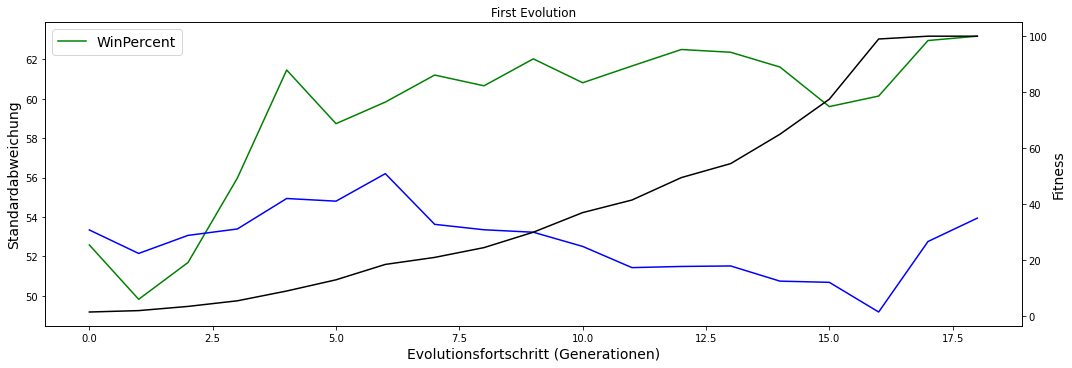

In [352]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
fig, ax1 = plt.subplots()

ax1.set_xlabel('Evolutionsfortschritt (Generationen)', fontsize=14)
ax1.set_ylabel('Standardabweichung', fontsize=14)

#WinPercent, = ax1.plot(df_Mean['WinPercent'].values, color='green', label='WinPercent')
#Fitness, = ax1.plot(df_Mean["supp1-ConquerRadius"].values, color='blue', label='Fitness')
#Fitness, = ax1.plot(df_Mean["supp2-ConquerRadius"].values, color='red', label='Fitness')
Fitness, = ax1.plot(df_Mean["deff1-AttackMinLife"].values, color='green', label='Fitness')
Fitness, = ax1.plot(df_Mean["deff2-AttackMinLife"].values, color='blue', label='Fitness')
#Fitness, = ax1.plot(domi["Score"].values, color='red', label='Fitness')
#Fitness, = ax1.plot(domi["suppScore"].values, color='green', label='Fitness')
#std, = ax1.plot(df_standardDeviation["off1-AttackMinLife"].values, color='blue', label='RadiusExpansionStep')
#std1, = ax1.plot(df_standardDeviation["off2-AttackMinLife"].values, color='red', label='MaxConquerRadius')
#std2, = ax1.plot(df_standardDeviation["supp-AttackMinLife"].values, color='green', label='InitialConquerRadius')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

color='black'
ax2.set_ylabel('Fitness', color=color, fontsize=14)
#ax2.plot(domi["Winner"].values, color='black', label='Fitness')
ax2.plot(df_Mean["WinPercent"].values, color=color)
#ax2.plot(df_EA["Fitness"].values, color=color)
ax2.tick_params(axis='y')

fig.tight_layout()
plt.title('First Evolution')
plt.legend(handles = [WinPercent], fontsize=14)
plt.show()

<IPython.core.display.Javascript object>


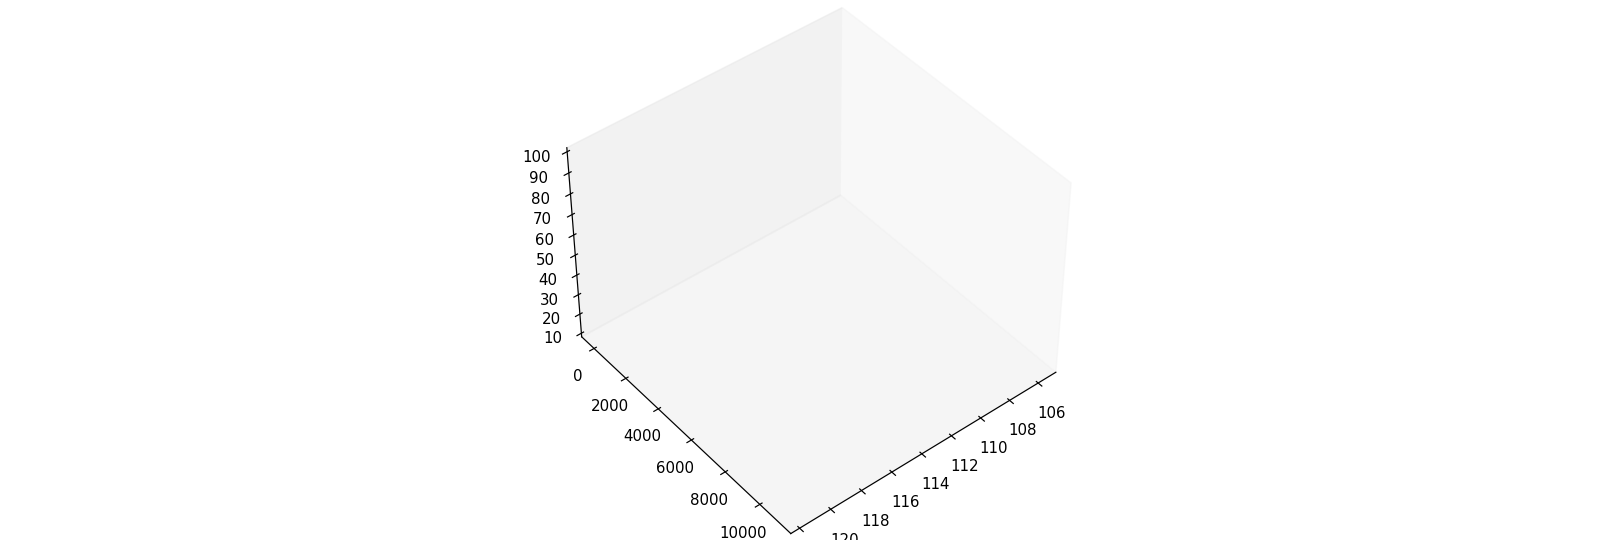

In [340]:
%matplotlib notebook
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib import animation
from mpl_toolkits.mplot3d import axes3d as plt3d

fig = plt.figure()
ax = plt3d.Axes3D(fig)

ax.view_init(45, -45)
ax.grid(False)
#ax.set_zlim(-100, 0)
#plt.xlim(0, 600)
#plt.ylim(0, 50)
colors1 = cm.colors.LinearSegmentedColormap.from_list("", ["red","red"])
colors2 = cm.colors.LinearSegmentedColormap.from_list("", ["green","green"])
colors3 = cm.colors.LinearSegmentedColormap.from_list("", ["blue","blue"])
#fig.colorbar(points, shrink=0.5, aspect=5)

domi1 = df_EA[df_EA['dominanceLevel'] == 1]
domi2 = df_EA[df_EA['dominanceLevel'] == 2]
domi3 = df_EA[df_EA['dominanceLevel'] == 3]
domi4 = df_EA[df_EA['dominanceLevel'] == 4]
domi = domi4.iloc[domi4.index.get_level_values('Evolution') == 27]

# Data for three-dimensional scattered points
zdata = domi["deffScore"].values
xdata = domi["Score"].values
ydata = domi["suppScore"].values

#points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors, vmin=-85, vmax=-10);
points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors1)
#ax.plot_trisurf(xdata, ydata, zdata, cmap='viridis', edgecolor='none');
ax.set_title('Score');
ax.set_xlabel('Attack')
ax.set_ylabel('Support')
ax.set_zlabel('Defensive');


def animate_scatters(iteration, points,zdata,ydata,xdata):
    domiA = domi1.iloc[domi1.index.get_level_values('Evolution') == iteration]
    domiB = domi2.iloc[domi2.index.get_level_values('Evolution') == iteration]
    domiC = domi3.iloc[domi3.index.get_level_values('Evolution') == iteration]
    
    ax.clear()
    ax.set_title("Score");
    ax.grid(False)
    #ax.set_zlim(-500, 0)
    #plt.xlim(0, 1500)
    #plt.ylim(0, 100)
    
    # Data for three-dimensional scattered points
    zdata = domiA["deffScore"].values
    xdata = domiA["Score"].values
    ydata = domiA["suppScore"].values
    points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors1)
    zdata = domiB["deffScore"].values
    xdata = domiB["Score"].values
    ydata = domiB["suppScore"].values
    points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors2)
    zdata = domiC["deffScore"].values
    xdata = domiC["Score"].values
    ydata = domiC["suppScore"].values
    points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors3)
    
    return points

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate_scatters, fargs=(points,zdata,ydata,xdata), interval=1000, blit=False)
plt.show()